# Analítica de datos (bigData)


#### Fuente de datos con volumen, variedad, velocidad… gestionar esos datos y mostrarlos visualmente

Como fuente de datos he utilizado un archivo csv llamado 'population_total.csv' el cual contiene la población total de todos los países a lo largo de los años. Contiene un total de 3 columnas (country, year, population) las cuales son el país, el año y la población y un total de 4185 filas (4186 si cuento la cabecera). Los años estan comprendidos entre 1955 y 2020 y los países son todos los países del mundo.

He obtenido esta fuente de datos a través de un repositorio de GitHub llamado data-visualization cuyo propietario es Frank Andrade: https://github.com/ifrankandrade/data-visualization/blob/main/datasets/population/population_total.csv

#### Diseña un Python que consuma gran volumen de datos y lo muestre visualmente (gráfico, dashboard…)

Primero en caso de no tener instaladas las librerías habría que instalar pandas y plotly para poder analizar y visualizar datos:


pip install pandas
pip install plotly


También habría que instalar la librería cufflinks, ya que será el intermediario entre pandas y plotly para poder hacer gráficos interactivos:


pip install cufflinks

In [46]:
#importo las librerias mencionadas anteriormente
import pandas as pd #pandas con el alias pd
import cufflinks as cf #cufflinks con el alias cf

#con pandas leo el csv a traves de la ruta de GitHub donde se encuentra subido
pd.read_csv(r'https://raw.githubusercontent.com/ifrankandrade/data-visualization/main/datasets/population/population_total.csv')

,country,year,population
0,China,2020.0,1.439324e+09
1,China,2019.0,1.433784e+09
2,China,2018.0,1.427648e+09
3,China,2017.0,1.421022e+09
4,China,2016.0,1.414049e+09
...,...,...,...
4180,United States,1965.0,1.997337e+08
4181,United States,1960.0,1.867206e+08
4182,United States,1955.0,1.716853e+08
4183,India,1960.0,4.505477e+08


In [34]:
#asigno a la variable df_population el dataframe para trabajar con el
df_population = pd.read_csv(r'https://raw.githubusercontent.com/ifrankandrade/data-visualization/main/datasets/population/population_total.csv')

#elimino los valores nulos para evitar posibles problemas
df_population = df_population.dropna()

#remodelo el dataframe para darle mejor forma
#index seran los años, las columnas seran los paises y los valores sera el numero de la poblacion
df_population = df_population.pivot(index='year', columns='country', values='population')

#selecciono solo 10 paises del dataframe para simplificar las futuras graficas y obtener resultados mas limpios
df_population = df_population[['United States', 'France', 'Spain', 'Italy', 'India', 'China', 'Indonesia', 'Brazil', 'South Africa', 'Egypt']]

#lo muestro
df_population

country,United States,France,Spain,Italy,India,China,Indonesia,Brazil,South Africa,Egypt
year,,,,,,,,,,
1955.0,171685336.0,43411367.0,29048395.0,48335578.0,4.098806e+08,6.122416e+08,77273425.0,62533919.0,15206502.0,23223124.0
1960.0,186720571.0,45673146.0,30402411.0,49699951.0,4.505477e+08,6.604081e+08,87751068.0,72179226.0,17099840.0,26632894.0
1965.0,199733676.0,48746652.0,32146263.0,51677257.0,4.991233e+08,7.242190e+08,100267062.0,83373530.0,19384841.0,30433022.0
1970.0,209513341.0,50763920.0,33883749.0,53518969.0,5.551898e+08,8.276014e+08,114793178.0,95113265.0,22069776.0,34513850.0
1975.0,219081251.0,52688576.0,35879209.0,55265284.0,6.231029e+08,9.262409e+08,130680727.0,107216205.0,25195187.0,38549142.0
1980.0,229476354.0,53868009.0,37698196.0,56349349.0,6.989528e+08,1.000089e+09,147447836.0,120694009.0,28556769.0,43309063.0
1985.0,240499825.0,55254848.0,38733876.0,56936774.0,7.843600e+08,1.075589e+09,164982451.0,135274080.0,32678874.0,49258732.0
1990.0,252120309.0,56666849.0,39202525.0,57048236.0,8.732778e+08,1.176884e+09,181413402.0,149003223.0,36800509.0,56134475.0
1995.0,265163745.0,57801892.0,39787419.0,57174408.0,9.639226e+08,1.240921e+09,196934260.0,162019896.0,41435758.0,62334034.0


### Lineplot (grafico de lineas)

In [35]:
#el tipo de grafico sera "line" (lineas), el titulo del eje x sera Años, el del eje y Poblacion
#el titulo del grafico sera Años vs Poblacion
df_population.iplot(kind='line', xTitle='Años', yTitle='Poblacion', title='Años vs Poblacion')

### Barplot (grafico de barras)

In [38]:
#poblacion de estos 10 paises en el año 2020
#dentro de los index (que eran los años ya que lo remodelamos anteriormente) selecciono el numero 2020
df_population_2020 = df_population[df_population.index.isin([2020])]

#cambio columnas por filas para mostrar los paises como columna (metodo transpose)
df_population_2020 = df_population_2020.T

#el tipo de grafico sera "bar" (barras), he elegido que estan sean de color verde clarito, el eje x sera Años,
#el del eje y Poblacion y el titulo del grafico sera Poblacion en 2020
df_population_2020.iplot(kind='bar', color='lightgreen', xTitle='Años', yTitle='Poblacion',
                           title='Poblacion en 2020')

### Multiple Barplot (grafico de barras multiples)

In [39]:
# en este caso mostrare la poblacion en varios años (1980, 1990, 2000, 2010, 2020)
df_population_variosanos = df_population[df_population.index.isin([1980, 1990, 2000, 2010, 2020])]
df_population_variosanos.iplot(kind='bar', xTitle='Años', yTitle='Poblacion')

### Boxplot (grafico de caja)

In [40]:
#mostrar la distribucion de la poblacion de España, al interactuar muestra
#el valor de la poblacion maxima, la minima, la mediana...
df_population['Spain'].iplot(kind='box', color='blue', yTitle='Poblacion')

### Multiple Boxplot (grafica multiple de caja)

In [41]:
#en este caso bastara con eliminar la especificacion anterior (la que se referia al pais elegido)
df_population.iplot(kind='box', xTitle='Paises', yTitle='Poblacion')

### Histogram (histograma)

In [42]:
#muestro dos histogramas en un solo grafico
#datos de la poblacion de Francia y de España
df_population[['France', 'Spain']].iplot(kind='hist', xTitle='Poblacion')

### Piechart (grafico circular / de tarta)

In [44]:
#muestro el porcentaje de poblacion en 2020
#primero reseteo los index del dataframe para obtener el campo pais (country) como columna en vez de como index
df_population_2020 = df_population_2020.reset_index()

#en la columna aparece "2020.0" ya que es un valor numerico, por lo que la renombro a "2020" (como cadena)
df_population_2020 = df_population_2020.rename(columns={2020:'2020'})

# plotting
df_population_2020.iplot(kind='pie', labels='country', values='2020', title='Poblacion en 2020 (%)')

### Scatter Plot (grafico de dispersion)

In [45]:
df_population.iplot(kind='scatter', mode='markers', xTitle='Años', yTitle='Poblacion', title='Años vs Poblacion')

# Dejando el dataframe de poblacion a un lado...

Añadir otros gráficos que puedo representar sin necesidad del dataframe

### Grafico 3D

In [51]:
#gráfico de superficie 3D
df = pd.DataFrame({"A":[100,200,300,200,100],"B":[100,
200,300,200,100], "C":[100,200,300,200,100]})
#muestro los datos
df.head()

,A,B,C
0,100,100,100
1,200,200,200
2,300,300,300
3,200,200,200
4,100,100,100


In [52]:
#muestro los datos en un gráfico 3D usando el tipo de “surface”
df.iplot(kind = "surface")

In [53]:
#cambio la escala de colores para que sea visualmente más atractiva
df.iplot(kind = "surface", colorscale = "rdylbu")

### Otro ejemplo de grafico 3D

Es necesario disponer de la libreria matplotlib (pip install matplotlib) y numpy (pip install numpy)

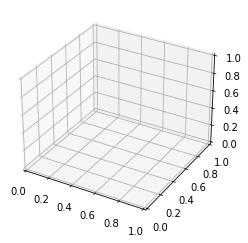

In [61]:
# importo las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# creo la figura
fig = plt.figure()

# creo el plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# muestro el gráfico
plt.show()

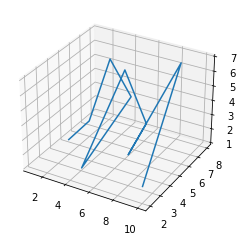

In [67]:
# importo las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style

# creo la figura
fig = plt.figure()

# creo el plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# almaceno datos en un array bi-dimensional (creo un array para cada eje)
x = np.array([[1,2,3,4,5,6,7,8,9,10]])
y = np.array([[5,6,7,8,2,5,6,3,7,2]])
z = np.array([[1,2,6,3,2,7,3,3,7,2]])

# plot_wireframe permite agregar los datos x, y, z (por eso es 3D)
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(x, y, z)

# muestro el gráfico
plt.show()

### Scatter en 3D

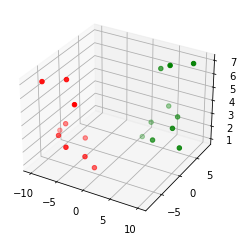

In [68]:
# importo las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# creo la figura
fig = plt.figure()

# creo el plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# defino los datos de prueba para cada eje
x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,7,8,2,5,6,3,7,2]
z = [1,2,6,3,2,7,3,3,7,2]

# añado datos adicionales
x2 = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]
y2 = [-5,-6,-7,-8,-2,-5,-6,-3,-7,-2]
z2 = [1,2,6,3,2,7,3,3,7,2]

# agrego los puntos en el plano 3D
ax1.scatter(x, y, z, c='g', marker='o')
ax1.scatter(x2, y2, z2, c ='r', marker='o')

# muestro el gráfico
plt.show()

### Barras en 3D

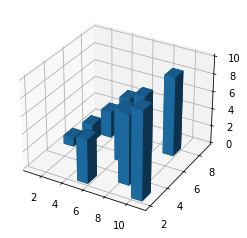

In [69]:
# importo las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# creo la figura
fig = plt.figure()

# creo el plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# defino los datos de prueba para cada eje
x3 = [1,2,3,4,5,6,7,8,9,10]
y3 = [5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1,2,3,4,5,6,7,8,9,10]

# utilizo el método bar3d para graficar las barras
ax1.bar3d(x3, y3, z3, dx, dy, dz)

# muestro el gráfico
plt.show()